In [1]:
import pandas as pd
missing_values=["?"]
df=pd.read_csv("hepatitis.csv",header=None,na_values=missing_values)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [2]:
df.shape

(155, 20)

In [3]:
df.dtypes

0       int64
1       int64
2       int64
3     float64
4       int64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19      int64
dtype: object

In [4]:
df.isna().any()

0     False
1     False
2     False
3      True
4     False
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19    False
dtype: bool

In [5]:
df.groupby(df.iloc[:,0]).count().T.head()

,1,2
0,32,123
1,32,123
2,32,123
3,32,122
4,32,123


In [6]:
print(32/(32+123))
print(123/(32+123))

0.2064516129032258
0.7935483870967742


In [7]:
df=df.fillna(df.median())
df.isna().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [74]:
X=df.iloc[:,1:20]
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,61.0,1
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,61.0,1
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,61.0,1
3,31,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,200.0,4.0,61.0,1


In [9]:
y=pd.DataFrame(df.iloc[:,0]).rename(columns={0:"Class"})
y.head()

,Class
0,2
1,2
2,2
3,2
4,2


In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.894192,2.947457,-1.019546,0.428026,1.367615,0.805566,0.510061,-2.280351,0.794719,0.489898,0.700275,0.3849,0.362473,-0.346128,-0.352069,-0.760716,0.265479,-0.028225,-0.907485
1,0.702579,-0.339276,-1.019546,0.428026,-0.731200,0.805566,0.510061,-2.280351,0.794719,0.489898,0.700275,0.3849,0.362473,-0.430351,0.713349,-0.488927,-0.544545,-0.028225,-0.907485
2,2.938059,-0.339276,0.980829,0.428026,-0.731200,0.805566,0.510061,0.438529,0.794719,0.489898,0.700275,0.3849,0.362473,-0.598796,-0.117677,-0.602173,0.265479,-0.028225,-0.907485
3,-0.814353,-0.339276,0.980829,-2.336308,1.367615,0.805566,0.510061,0.438529,0.794719,0.489898,0.700275,0.3849,0.362473,-0.598796,-1.183096,-0.375682,0.265479,1.080087,-0.907485
4,-0.574838,-0.339276,0.980829,0.428026,1.367615,0.805566,0.510061,0.438529,0.794719,0.489898,0.700275,0.3849,0.362473,-0.346128,-0.352069,1.300348,0.265479,-0.028225,-0.907485


In [11]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
11,43.222874
16,40.150046
13,37.781649
10,27.302814
12,23.129842
5,19.936173
18,19.714833
17,15.952451
4,15.811950
9,8.883871


In [12]:
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest=RandomForestClassifier(n_estimators=185,criterion="gini",max_depth=2,min_samples_split=4,min_samples_leaf=4,max_features="log2",bootstrap=True,n_jobs=-1,warm_start=False,class_weight="balanced",ccp_alpha=0.007,random_state=0)
scores=cross_val_score(forest,X,np.asarray(y).reshape(155,),cv=10)
print("Accuracy: ",scores.mean())

Accuracy:  0.8241666666666667


In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(forest, X, np.asarray(y).reshape(155,), cv=10)
AUC = roc_auc_score(y, y_pred)
print("AUC for the Random Forest model: ",AUC)

AUC for the Random Forest model:  0.7977642276422765


In [14]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for the Random Forest model: \n",confusion_matrix(y,y_pred))

Confusion matrix for the Random Forest model: 
 [[ 24   8]
 [ 19 104]]


In [15]:
print("Random Forest model: \n")
print("True positive rate: ",104/(104+19))
print("True negative rate: ",24/(24+8))

Random Forest model: 

True positive rate:  0.8455284552845529
True negative rate:  0.75


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gradient=GradientBoostingClassifier(loss="exponential",learning_rate=0.02,n_estimators=290,subsample=0.5,criterion="friedman_mse",min_samples_split=5,min_samples_leaf=1,max_depth=4,max_features="sqrt",ccp_alpha=0.01,random_state=0)
scores=cross_val_score(gradient,X,np.asarray(y).reshape(155,),cv=8)
print("Accuracy: ",scores.mean())

Accuracy:  0.8585526315789473


In [18]:
y_pred = cross_val_predict(gradient, X, np.asarray(y).reshape(155,), cv=8)
AUC = roc_auc_score(y, y_pred)
print("AUC for the Gradient Boosting model: ",AUC)

AUC for the Gradient Boosting model:  0.7371697154471545


In [19]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for the Gradient Boosting model: \n",confusion_matrix(y,y_pred))

Confusion matrix for the Gradient Boosting model: 
 [[ 17  15]
 [  7 116]]


In [20]:
print("Gradient Boosting model: \n")
print("True positive rate: ",116/(7+116))
print("True negative rate: ",17/(17+15))

Gradient Boosting model: 

True positive rate:  0.943089430894309
True negative rate:  0.53125


In [21]:
from sklearn import svm
import numpy as np

svm=svm.SVC(C=0.01,kernel="linear",degree=1,gamma="auto",cache_size=50,
            decision_function_shape="ovo",probability=True,random_state=0)
scores=cross_val_score(svm,X,np.asarray(y).reshape(155,),cv=25)
print("Accuracy: ",scores.mean())

Accuracy:  0.841904761904762


In [22]:
y_pred = cross_val_predict(svm, X, np.asarray(y).reshape(155,), cv=25)
AUC = roc_auc_score(y, y_pred)
print("AUC for the SVM model: ",AUC)

AUC for the SVM model:  0.6902947154471545


In [23]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for the SVM model: \n",confusion_matrix(y,y_pred))

Confusion matrix for the SVM model: 
 [[ 14  18]
 [  7 116]]


In [24]:
print("SVM model: \n")
print("True positive rate: ",116/(116+7))
print("True negative rate: ",14/(14+18))

SVM model: 

True positive rate:  0.943089430894309
True negative rate:  0.4375


In [25]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=7,weights="distance",algorithm="brute",leaf_size=100,p=1,n_jobs=-1)
scores=cross_val_score(KNN,X,np.asarray(y).reshape(155,),cv=7)
print("Accuracy: ",scores.mean())

Accuracy:  0.8517786561264822


In [26]:
y_pred = cross_val_predict(KNN, X, np.asarray(y).reshape(155,), cv=25)
AUC = roc_auc_score(y, y_pred)
print("AUC for the KNN model: ",AUC)

AUC for the KNN model:  0.701854674796748


In [27]:
print("Confusion matrix for the KNN model: \n",confusion_matrix(y,y_pred))

Confusion matrix for the KNN model: 
 [[ 15  17]
 [  8 115]]


In [28]:
print("KNN model: \n")
print("True positive rate: ",115/(115+8))
print("True negative rate: ",15/(15+17))

KNN model: 

True positive rate:  0.9349593495934959
True negative rate:  0.46875


The most promising model so far is the Random Forest model. Let's see if we can further improve that by adjusting the threshold.

In [29]:
y_pred =pd.DataFrame((cross_val_predict(forest, X,np.asarray(y).reshape(155,), cv=12,method="predict_proba"))).rename(columns={0:"pred_0",1:"pred_1"})
y_pred.head()

,pred_0,pred_1
0,0.142971,0.857029
1,0.312883,0.687117
2,0.249624,0.750376
3,0.125774,0.874226
4,0.179251,0.820749


In [30]:
y_probs1=y_pred[["pred_1"]]

In [31]:
import numpy as np
thresholds=np.arange(0,1,0.001)

In [32]:
def to_labels(pos_probs,threshold):
    return (pos_probs >= threshold).astype('int')

In [33]:
from sklearn.metrics import f1_score
scores=[f1_score(y, to_labels(y_probs1,t),average="macro") for t in thresholds]

In [34]:
ix=np.argmax(scores)
print((thresholds[ix],scores[ix]))

(0.0, 0.1711229946524064)


No room for improvement by adjusting the threshold.

I am going to extract a sample from the original dataset and generate synthetic train data from this sample.

In [38]:
df_1=df[df.iloc[:,0]==1]
df_1=df_1.sample(frac=0.5)
df_1.shape

(16, 20)

In [39]:
df_2=df[df.iloc[:,0]==2]
df_2=df_2.sample(frac=0.28)
df_2.shape

(34, 20)

Drop the rows that were extracted as sample for the synthetic train data.

In [40]:
index1=df_1.index.to_list()
index2=df_2.index.to_list()

In [41]:
test=df.drop(index1)

In [42]:
test=test.drop(index2)

In [43]:
test.shape

(105, 20)

In [44]:
test.to_csv("test.csv")

In [45]:
sample=pd.concat([df_1,df_2],axis=0)
sample.shape

(50, 20)

In [46]:
sample.to_csv("hepatitis sample.csv")

In [47]:
train=pd.read_csv("MOCK_DATA _2.csv",header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,54,1,2,2,1,2,2,1,1,2,2,2,2,3.2,85,28,3.8,61,2
1,2,39,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,20,4.0,61,1
2,1,56,1,1,2,1,1,1,1,1,2,1,2,2,2.9,90,153,4.0,61,2
3,2,32,1,2,2,1,1,1,2,2,2,1,2,1,3.5,215,54,3.4,29,1
4,1,35,1,1,2,1,2,2,2,2,1,1,1,2,1.5,138,58,2.6,61,2


In [48]:
train.shape

(155, 20)

In [49]:
train.groupby(train.iloc[:,0]).count().T.head()

,1,2
0,43,112
1,43,112
2,43,112
3,43,112
4,43,112


In [50]:
print(112/(43+112))
print(43/(43+112))

0.7225806451612903
0.27741935483870966


In [51]:
X_train=df.iloc[:,1:20]
X_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,61.0,1
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,61.0,1
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,61.0,1
3,31,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,200.0,4.0,61.0,1


In [52]:
y_train=pd.DataFrame(df.iloc[:,0]).rename(columns={0:"Class"})
y_train.head()

,Class
0,2
1,2
2,2
3,2
4,2


In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.894192,2.947457,-1.019546,0.428026,1.367615,0.805566,0.510061,-2.280351,0.794719,0.489898,0.700275,0.3849,0.362473,-0.346128,-0.352069,-0.760716,0.265479,-0.028225,-0.907485
1,0.702579,-0.339276,-1.019546,0.428026,-0.731200,0.805566,0.510061,-2.280351,0.794719,0.489898,0.700275,0.3849,0.362473,-0.430351,0.713349,-0.488927,-0.544545,-0.028225,-0.907485
2,2.938059,-0.339276,0.980829,0.428026,-0.731200,0.805566,0.510061,0.438529,0.794719,0.489898,0.700275,0.3849,0.362473,-0.598796,-0.117677,-0.602173,0.265479,-0.028225,-0.907485
3,-0.814353,-0.339276,0.980829,-2.336308,1.367615,0.805566,0.510061,0.438529,0.794719,0.489898,0.700275,0.3849,0.362473,-0.598796,-1.183096,-0.375682,0.265479,1.080087,-0.907485
4,-0.574838,-0.339276,0.980829,0.428026,1.367615,0.805566,0.510061,0.438529,0.794719,0.489898,0.700275,0.3849,0.362473,-0.346128,-0.352069,1.300348,0.265479,-0.028225,-0.907485


In [54]:
test=pd.read_csv("test.csv").drop(["Unnamed: 0"],axis=1)
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,61.0,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,61.0,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,61.0,1
3,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1
4,1,51,1,1.0,2,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,85.0,58.0,4.0,61.0,1


In [55]:
test.groupby(test.iloc[:,0]).count().T.head()

0,1,2
0,16,89
1,16,89
2,16,89
3,16,89
4,16,89


In [56]:
X_test=test.iloc[:,1:20]
X_test.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,61.0,1
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,61.0,1
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,61.0,1
3,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1
4,51,1,1.0,2,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,85.0,58.0,4.0,61.0,1


In [57]:
X_test=pd.DataFrame(scaler.fit_transform(X_test))
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.881501,2.549510,-1.048809,0.439525,1.355669,0.737643,0.485071,-2.358495,0.800391,0.470032,0.677003,0.324443,0.375905,-0.290986,-0.370371,-0.872664,0.211148,-0.075360,-0.816497
1,0.645852,-0.392232,-1.048809,0.439525,-0.737643,0.737643,0.485071,-2.358495,0.800391,0.470032,0.677003,0.324443,0.375905,-0.382464,0.627805,-0.527651,-0.704991,-0.075360,-0.816497
2,2.784147,-0.392232,0.953463,0.439525,-0.737643,0.737643,0.485071,0.423999,0.800391,0.470032,0.677003,0.324443,0.375905,-0.565419,-0.150772,-0.671407,0.211148,-0.075360,-0.816497
3,-0.576030,-0.392232,0.953463,0.439525,1.355669,0.737643,0.485071,0.423999,0.800391,0.470032,0.677003,0.324443,0.375905,-0.382464,-0.170736,-0.728909,0.211148,0.818017,-0.816497
4,0.722220,-0.392232,-1.048809,0.439525,-0.737643,0.737643,-2.061553,0.423999,0.800391,-2.127514,-1.477098,0.324443,0.375905,-0.290986,-0.370371,-0.297642,0.211148,-0.075360,-0.816497


In [58]:
y_test=pd.DataFrame(test.iloc[:,0])
y_test

,0
0,2
1,2
2,2
3,2
4,1
...,...
100,2
101,2
102,1
103,2


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
forest=RandomForestClassifier(n_estimators=210,criterion="entropy",max_depth=6,min_samples_split=3,min_samples_leaf=2,max_features="sqrt",bootstrap=True,n_jobs=-1,warm_start=False,class_weight="balanced",ccp_alpha=0.01,random_state=0).fit(X_train,y_train)
#scores=cross_val_score(forest,X_train,np.asarray(y_train).reshape(155,),cv=10)
#print("Accuracy: ",scores.mean())
forest

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(ccp_alpha=0.01, class_weight='balanced',
                       criterion='entropy', max_depth=6, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=210, n_jobs=-1, random_state=0)

In [109]:
train_pred=forest.predict(X_train)
print("Random Forest: accuracy on the synthetic train data: ",accuracy_score(y_train,train_pred))

Random Forest: accuracy on the synthetic train data:  0.9741935483870968


In [110]:
from sklearn.metrics import accuracy_score
y_pred=forest.predict(X_test)
print("Random Forest: accuracy on the real test data: ", accuracy_score(y_test,y_pred))

Random Forest: accuracy on the real test data:  0.9619047619047619


In [111]:
from sklearn.metrics import roc_auc_score
print("Random Forest: AUC on the real test data: ",roc_auc_score(y_test,y_pred))

Random Forest: AUC on the real test data:  0.9262640449438202


In [112]:
from sklearn.metrics import confusion_matrix
print("Random Forest: confusion matrix on the real test data: \n",
      confusion_matrix(y_test,y_pred))

Random Forest: confusion matrix on the real test data: 
 [[14  2]
 [ 2 87]]


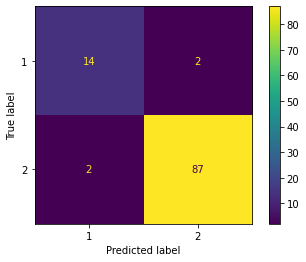

In [113]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(forest,X_test,y_test)
plt.show()

In [114]:
print("True positive rate: ",14/(14+2))
print("True negative rate: ", 87/(87+2))

True positive rate:  0.875
True negative rate:  0.9775280898876404
